In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

## model I, Eqs. (1) of the main text

In [2]:
# model I, eqs (1) in the main text

def eqs1_rhs(x, t, Kd, alpha, gamma):
    m, c = x
    alpham, alphap = alpha
    gm, gp = gamma
    return np.array([alpham / (1 + (c/Kd)**2) - gm*m,
                     alphap*m - gp*c])

# Initial condiations
x0 = np.array([1, 1])
ti = 0

tf = 100 #Time
n_points = 5000 # Number of points to use in plots
t = np.linspace(ti, tf, n_points)

#setting parameters values
Kd = 40
alpha = [33, 4.5]
gamma = [0.23, 0.23]

# Solving 
x = scipy.integrate.odeint(eqs1_rhs, x0, t,args=(Kd, alpha, gamma))

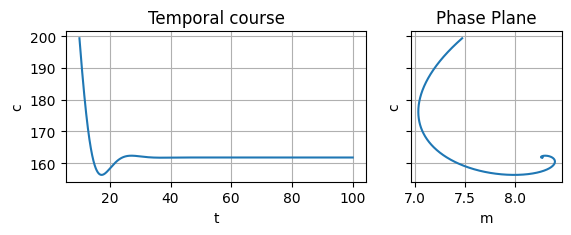

In [4]:
#Plotting
figure, axis = plt.subplots(1,2,sharex="col", sharey="row", gridspec_kw=dict(width_ratios=[2, 1])) 
axis[0].plot(t[500:], x[500:,1]) 
axis[0].set_title("Temporal course")  
axis[0].set_xlabel('t')
axis[0].set_ylabel('c')
axis[1].plot(x[500:,0], x[500:,1]) 
axis[1].set_title("Phase Plane") 
axis[1].set_xlabel('m')
axis[1].set_ylabel('c')
axis[0].set_box_aspect(1/2)
axis[1].set_box_aspect(1)
axis[0].grid()
axis[1].grid()
plt.show() 

## model II, Eqs. (2) of the main text

In [21]:
def eqs2_rhs(x, t, Kd, alpha, beta, gamma):
    m0, m, c0, c = x
    alpham, alphap = alpha
    beta1, beta2 = beta
    gm, gp = gamma
    return np.array([alpham / (1 + (c/Kd)**2) - beta1*m0,
                     beta1*m0 - gm*m,
                     alphap*m - beta2*c0,
                     beta2*c0- gp*c])

# Initial condiations
x0 = np.array([1, 1, 0, 0])
ti = 0


tf = 200 #Time
n_points = 10000 # Number of points to use in plots
time = np.linspace(ti, tf, n_points)

#setting parameters values
Kd = 40.
alpha = [33., 4.5]
beta = [1200./6400., 360./2130.]
gamma = [0.23, 0.23]

# Solving 
x = scipy.integrate.odeint(eqs2_rhs, x0, time, args=(Kd, alpha, beta, gamma))

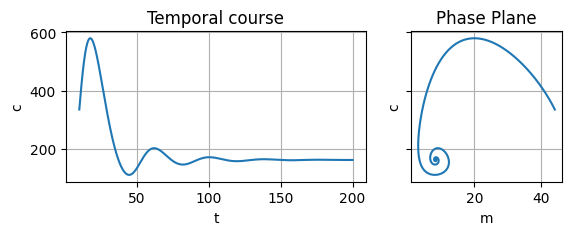

In [22]:
#Plotting
figure, axis = plt.subplots(1,2,sharex="col", sharey="row", gridspec_kw=dict(width_ratios=[2, 1])) 
axis[0].plot(time[500:], x[500:,3]) 
axis[0].set_title("Temporal course")  
axis[0].set_xlabel('t')
axis[0].set_ylabel('c')
axis[1].plot(x[500:,1], x[500:,3]) 
axis[1].set_title("Phase Plane") 
axis[1].set_xlabel('m')
axis[1].set_ylabel('c')
axis[0].set_box_aspect(1/2)
axis[1].set_box_aspect(1)
axis[0].grid()
axis[1].grid()
plt.show() 

## model III with delay, Eqs. (6) of the main text

In [6]:
#you need to install jitcdde & sympy libraries
from jitcdde import jitcdde, y, t
import sympy as sp

#defining the set of delay diff equations
def dde_rhs(Kd, rr, alpha, gamma, tau):
    gm, gp = gamma
    alpham, alphap = alpha
    r1, r2 = rr
    tauN, tauM = tau
    equation = [
        alpham / (1 + (y(3,t)/Kd)**2) - r1*y(0,t),
        r1*y(0, t-tauN) - gm*y(1,t),
        alphap*y(1, t) - r2*y(2,t),
        r2*y(2, t-tauM) - gp*y(3,t)
    ]
    return equation

#setting parameters values
Kd = 40.
alpha = [33., 4.5]
rr = [1200., 360.]
gamma = [0.23, 0.23]
tau = [6400./1200., 2130./360.]

ddesys = jitcdde(dde_rhs(Kd, rr, alpha, gamma, tau),verbose=False)
ddesys.constant_past([1., 1., 0. ,0.]) # Initial conditions

ti = 0  #initial time
tf = 200 #ending time
n_points = 100000 # Number of points to use in plots
ts = np.linspace(ti, tf, n_points)

# Solving
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)

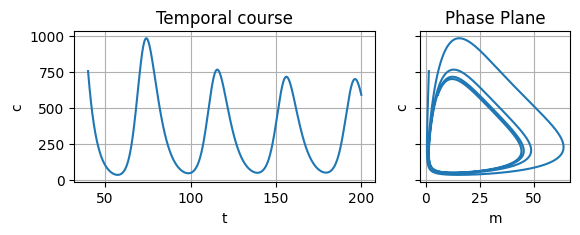

In [5]:
#Plotting
figure, axis = plt.subplots(1,2,sharex="col", sharey="row", gridspec_kw=dict(width_ratios=[2, 1])) 
axis[0].plot(ts[20000:], ys[20000:,3]) 
axis[0].set_title("Temporal course")  
axis[0].set_xlabel('t')
axis[0].set_ylabel('c')
axis[1].plot(ys[20000:,1], ys[20000:,3]) 
axis[1].set_title("Phase Plane") 
axis[1].set_xlabel('m')
axis[1].set_ylabel('c')
axis[0].set_box_aspect(1/2)
axis[1].set_box_aspect(1)
axis[0].grid()
axis[1].grid()
plt.show()

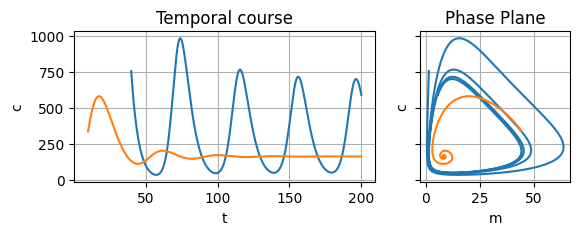

In [26]:
#plotting figure2
figure, axis = plt.subplots(1,2,sharex="col", sharey="row", gridspec_kw=dict(width_ratios=[2, 1])) 
axis[0].plot(ts[20000:], ys[20000:,3]) 
axis[0].plot(time[500:], x[500:,3])
axis[0].set_title("Temporal course")  
axis[0].set_xlabel('t')
axis[0].set_ylabel('c')
axis[1].plot(ys[20000:,1], ys[20000:,3]) 
axis[1].plot(x[500:,1], x[500:,3]) 
axis[1].set_title("Phase Plane") 
axis[1].set_xlabel('m')
axis[1].set_ylabel('c')
axis[0].set_box_aspect(1/2)
axis[1].set_box_aspect(1)
axis[0].grid()
axis[1].grid()
plt.show() 